# Starting analysis comparing Bike Theft with Bike Volume

In [1]:
#loading files needed
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import scipy.stats as stats
import numpy as np
from scipy.stats import linregress

# Files to Load
OTT_BV_2018to2020_LOAD = "../data_sets/OTT_BV_2018to2020.csv"
VAC_BV_aug2018to2020_LOAD = "../data_sets/VAC_BV_sept2018to2020.csv"
VAC_BV_jan_jul_2018_LOAD ="../data_sets/VAC_BV_jan-aug2018.csv"
OTT_theft_LOAD = "../data_sets/o_theft_clean.csv"
VAC_theft_LOAD = "../data_sets/v_theft_clean.csv"

# Read files and store into Pandas data frame
OTT_BV = pd.read_csv(OTT_BV_2018to2020_LOAD)
VAC_BV2 = pd.read_csv(VAC_BV_aug2018to2020_LOAD)
VAC_BV1 =pd.read_csv(VAC_BV_jan_jul_2018_LOAD)
OTT_theft = pd.read_csv(OTT_theft_LOAD)
VAC_theft = pd.read_csv(VAC_theft_LOAD)

## Summarizing Vancouver Monthly Bike Volume

In [2]:
#visualize data
VAC_BV1.head()

,Unnamed: 0,Date,Burrard Bridge,Hornby Street,Dunsmuir Street,Dunsmuir Viaduct,Canada Line,Union and Hawks,Lions Gate,Science World,10th and Clark,Point Grey Road,Year,Month,Total Bike Volume
0,101,18-Jan,47.0,24.0,29.0,30.0,7.0,39.0,18.0,48.0,23.0,13.0,2018,Jan,249.0
1,102,18-Feb,43.0,21.0,25.0,26.0,6.0,34.0,13.0,44.0,19.0,13.0,2018,Feb,219.0
2,103,18-Mar,78.0,33.0,37.0,39.0,12.0,57.0,27.0,85.0,33.0,30.0,2018,Mar,394.0
3,104,18-Apr,93.0,37.0,41.0,46.0,15.0,69.0,34.0,103.0,42.0,38.0,2018,Apr,477.0
4,105,18-May,181.0,67.0,58.0,76.0,27.0,124.0,67.0,202.0,73.0,83.0,2018,May,900.0


In [3]:
#visualize data
VAC_BV2.head()

,Unnamed: 0,Date,Burrard at Cornwall,Canada Line Bridge at West Kent,Comox at Thurlow,Dunsmuir Viaduct,East 10th at Clark,Hornby and Robson,Lions Gate Bridge at Spirit Trail,Ontario and 11th,...,Smithe at Expo,Stephens at Point Grey,Union at Hawks,Month-NonNumeric,Day,Year,Month,Numeric Date,Day of Week,Total Bike Volume
0,0,"August 1, 2018",8584,907,1339,3461,2739,3599,2631,2527,...,1479,1043,5386,August,1,2018,8,2018-08-01,Wednesday,69355
1,1,"August 2, 2018",6883,885,1023,3095,2511,3040,2274,2261,...,1402,841,4797,August,2,2018,8,2018-08-02,Thursday,59321
2,2,"August 3, 2018",5504,683,871,2484,2087,2574,1672,1949,...,1191,619,3745,August,3,2018,8,2018-08-03,Friday,50068
3,3,"August 4, 2018",7213,1028,1016,1462,1889,1940,2748,1881,...,651,835,3605,August,4,2018,8,2018-08-04,Saturday,68705
4,4,"August 5, 2018",6939,849,936,1406,1453,1681,2260,1598,...,631,849,3328,August,5,2018,8,2018-08-05,Sunday,61651


In [4]:
#summarize bike volume by year and month for 1st Vancouver data set
year_vac1=VAC_BV1.groupby(["Year","Month"])["Total Bike Volume"].sum()
year_vac1=pd.DataFrame(year_vac1)
year_vac1=year_vac1.reset_index()
#rename months for consistency with 2nd data set
year_vac1.loc[(year_vac1.Month == 'Apr'),'Month']='April'
year_vac1.loc[(year_vac1.Month == 'Feb'),'Month']='February'
year_vac1.loc[(year_vac1.Month == 'Jan'),'Month']='January'
year_vac1.loc[(year_vac1.Month == 'Jul'),'Month']='July'
year_vac1.loc[(year_vac1.Month == 'Jun'),'Month']='June'
year_vac1.loc[(year_vac1.Month == 'Mar'),'Month']='March'

#rename column for consistency with 2nd data set
year_vac1=year_vac1.rename(columns={"Month": "Month-NonNumeric"})
#data notes said that volume was to the nearest 1000, therefore * by 1000 to align with dataset #2
year_vac1["Total Bike Volume"]=year_vac1["Total Bike Volume"]*1000
year_vac1

,Year,Month-NonNumeric,Total Bike Volume
0,2018,April,477000.0
1,2018,February,219000.0
2,2018,January,249000.0
3,2018,July,1013000.0
4,2018,June,788000.0
5,2018,March,394000.0
6,2018,May,900000.0


In [5]:
##summarize bike volume by year and month for 2nd Vancouver data set
VAC_BV2['Year'] = VAC_BV2['Year'].astype(str)
VAC_BV2['Month'] = VAC_BV2['Month'].astype(str)
year_vac=VAC_BV2.groupby(["Year","Month-NonNumeric"])["Total Bike Volume"].sum()
year_vac=pd.DataFrame(year_vac)
year_vac=year_vac.reset_index()

In [6]:
#join both the datasets for 1 complete monthy vancouver bike volume
monthly_vac_bv= year_vac1.append(year_vac)
monthly_vac_bv

,Year,Month-NonNumeric,Total Bike Volume
0,2018,April,477000.0
1,2018,February,219000.0
2,2018,January,249000.0
3,2018,July,1013000.0
4,2018,June,788000.0
5,2018,March,394000.0
6,2018,May,900000.0
0,2018,August,1624974.0
1,2018,December,347983.0
2,2018,November,569126.0


In [7]:
#extract numeric month order to help with sorting data set for plotting
monthly_vac_bv["Order"] = monthly_vac_bv['Month-NonNumeric'].replace({'January':1, 'February':2, 'March':3, 'April':4,'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12})
monthly_vac_bv['Order'] = monthly_vac_bv['Order'].astype(int)

#sorting dataset by year and month
monthly_vac_bv=monthly_vac_bv.sort_values(by=["Year","Order"])
monthly_vac_bv = monthly_vac_bv.reset_index(drop=True)
monthly_vac_bv

,Year,Month-NonNumeric,Total Bike Volume,Order
0,2018,January,249000.0,1
1,2018,February,219000.0,2
2,2018,March,394000.0,3
3,2018,April,477000.0,4
4,2018,May,900000.0,5
5,2018,June,788000.0,6
6,2018,July,1013000.0,7
7,2018,August,1624974.0,8
8,2018,September,1057955.0,9
9,2018,October,900334.0,10


In [8]:
#adding additional column which is a combination of Year and Month for plotting
monthly_vac_bv['Order'] = monthly_vac_bv['Order'].astype(str)
monthly_vac_bv['Year'] = monthly_vac_bv['Year'].astype(str)
monthly_vac_bv['Yr-Mt'] =monthly_vac_bv['Year']+"-"+monthly_vac_bv['Order']  
monthly_vac_bv

,Year,Month-NonNumeric,Total Bike Volume,Order,Yr-Mt
0,2018,January,249000.0,1,2018-1
1,2018,February,219000.0,2,2018-2
2,2018,March,394000.0,3,2018-3
3,2018,April,477000.0,4,2018-4
4,2018,May,900000.0,5,2018-5
5,2018,June,788000.0,6,2018-6
6,2018,July,1013000.0,7,2018-7
7,2018,August,1624974.0,8,2018-8
8,2018,September,1057955.0,9,2018-9
9,2018,October,900334.0,10,2018-10


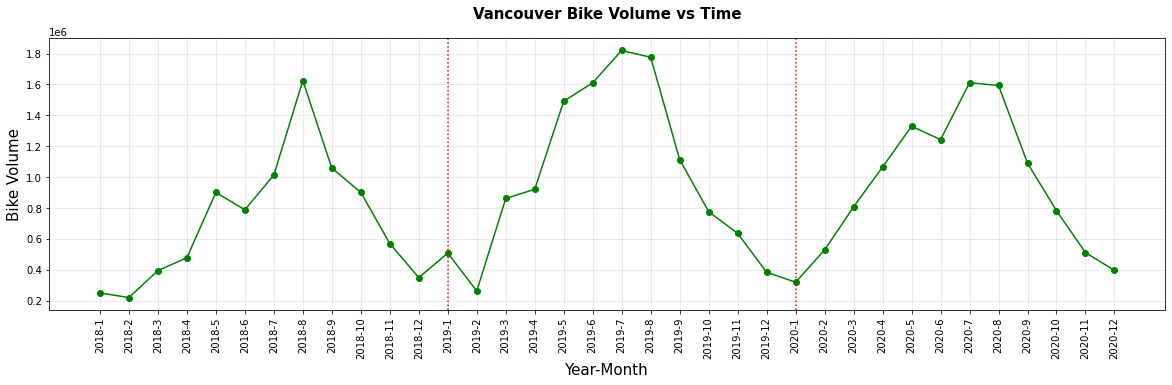

In [9]:
#plotting vancouver bike volume trend against time
plt.figure(figsize=(20,5))
plt.plot(monthly_vac_bv["Yr-Mt"],monthly_vac_bv["Total Bike Volume"],color = "g", marker = "o")
plt.xticks(rotation=90)
plt.title("Vancouver Bike Volume vs Time",fontsize = 15, fontweight = 'bold',y=1.05)
plt.ylabel("Bike Volume",fontsize = 15)
plt.xlabel("Year-Month",fontsize = 15)
plt.grid(b=None, which='major', axis='both', color = "grey", alpha = 0.20)
plt.axvline(12, color = "red", linestyle = "dotted")
plt.axvline(24, color = "red", linestyle = "dotted")


Plotting total bike volume against year-month shows a clear seasonal trend where bike volume is lowest in winter months and highest in summer months. This is to be expected since in winter temperatures are low and not ideal for bike riding

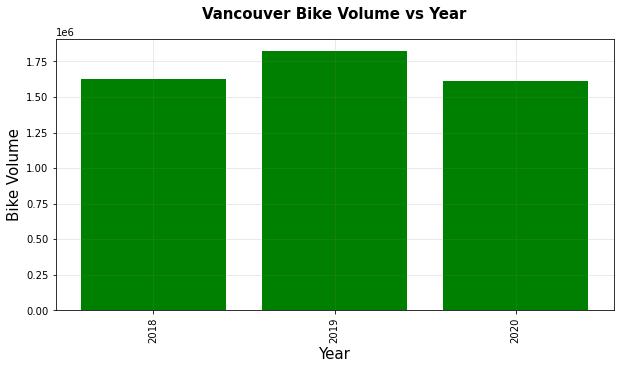

In [10]:
#plotting vancouver bike volume trend against time (year view)
plt.figure(figsize=(10,5))
plt.bar(monthly_vac_bv["Year"],monthly_vac_bv["Total Bike Volume"],color = "g")
plt.xticks(rotation=90)
plt.title("Vancouver Bike Volume vs Year",fontsize = 15, fontweight = 'bold',y=1.05)
plt.ylabel("Bike Volume",fontsize = 15)
plt.xlabel("Year",fontsize = 15)
plt.grid(b=None, which='major', axis='both', color = "grey", alpha = 0.20)


Over all does seems there is a slight decrease in biking volume between 2019 and 2020, but will conduct t-test next to confirm

In [11]:
#conducting t-test between 2019 and 2020 vancouver bike volume
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance


#extracting each year (using daily data, more data points)
BV_2019 = VAC_BV2.loc[VAC_BV2['Year'] == 2019]
BV_2020 = VAC_BV2.loc[VAC_BV2['Year'] == 2020]

stats.ttest_ind(BV_2019["Total Bike Volume"], BV_2020["Total Bike Volume"], equal_var=False)


Ttest_indResult(statistic=nan, pvalue=nan)

After comparing daily bike volume for 2019 and 2020, it cannot be concluded that 2020's bike volume was any different from 2019's since the p value is greater than 0.05. and the slight decrease is within bounds.

## Summarizing Ottawa Monthly Bike Volume

In [12]:
#visualize data
OTT_BV.head()

,Unnamed: 0,Date,1^ALEX,2^ORPY,3^COBY,5^LMET,8^SOMO,10^OGLD,11 OBVW,12a^ADAWE,12b^ADAWE,4^CRTZ,Day of week,Day,Month,Year,Total Bike Volume
0,0,Mon 1 Jan 2018,7.0,12.0,4.0,26.0,0.0,83.0,5.0,37.0,390.0,0.0,Mon,1,Jan,2018,564.0
1,1,Tue 2 Jan 2018,55.0,9.0,37.0,153.0,2.0,104.0,5.0,87.0,491.0,0.0,Tue,2,Jan,2018,943.0
2,2,Wed 3 Jan 2018,100.0,12.0,67.0,242.0,36.0,66.0,8.0,134.0,609.0,0.0,Wed,3,Jan,2018,1274.0
3,3,Thu 4 Jan 2018,112.0,10.0,51.0,300.0,18.0,64.0,6.0,131.0,561.0,0.0,Thu,4,Jan,2018,1253.0
4,4,Fri 5 Jan 2018,46.0,1.0,37.0,158.0,2.0,27.0,2.0,65.0,295.0,0.0,Fri,5,Jan,2018,633.0


In [13]:
#checking how many data points for each year in Ottawa BV data set
OTT_BV['Year'] = OTT_BV['Year'].astype(str)
year_ott=OTT_BV.groupby(OTT_BV["Year"])["Total Bike Volume"].count()
year_ott

Year
2018    365
2019    365
2020    366
Name: Total Bike Volume, dtype: int64

In [14]:
#summarize bike volume by year and month for Ottawa data set
year_ott=OTT_BV.groupby(["Year","Month"])["Total Bike Volume"].sum()
year_ott=pd.DataFrame(year_ott)
year_ott=year_ott.reset_index()
year_ott

,Year,Month,Total Bike Volume
0,2018,Apr,154331.0
1,2018,Aug,449401.0
2,2018,Dec,37325.0
3,2018,Feb,40084.0
4,2018,Jan,38983.0
5,2018,Jul,501474.0
6,2018,Jun,460974.0
7,2018,Mar,71675.0
8,2018,May,459992.0
9,2018,Nov,70422.0


In [15]:
#extract numeric month order to help with sorting data set for plotting
year_ott["Order"] = year_ott['Month'].replace({'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4,'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12})
year_ott['Order'] = year_ott['Order'].astype(int)

#sorting dataset by year and month
year_ott=year_ott.sort_values(by=["Year","Order"])
year_ott = year_ott.reset_index(drop=True)
year_ott

,Year,Month,Total Bike Volume,Order
0,2018,Jan,38983.0,1
1,2018,Feb,40084.0,2
2,2018,Mar,71675.0,3
3,2018,Apr,154331.0,4
4,2018,May,459992.0,5
5,2018,Jun,460974.0,6
6,2018,Jul,501474.0,7
7,2018,Aug,449401.0,8
8,2018,Sep,402186.0,9
9,2018,Oct,259100.0,10


In [16]:
#adding additional column which is a combination of Year and Month for plotting
year_ott['Order'] = year_ott['Order'].astype(str)
year_ott['Year'] = year_ott['Year'].astype(str)
year_ott['Yr-Mt'] =year_ott['Year']+"-"+monthly_vac_bv['Order']  
year_ott

,Year,Month,Total Bike Volume,Order,Yr-Mt
0,2018,Jan,38983.0,1,2018-1
1,2018,Feb,40084.0,2,2018-2
2,2018,Mar,71675.0,3,2018-3
3,2018,Apr,154331.0,4,2018-4
4,2018,May,459992.0,5,2018-5
5,2018,Jun,460974.0,6,2018-6
6,2018,Jul,501474.0,7,2018-7
7,2018,Aug,449401.0,8,2018-8
8,2018,Sep,402186.0,9,2018-9
9,2018,Oct,259100.0,10,2018-10


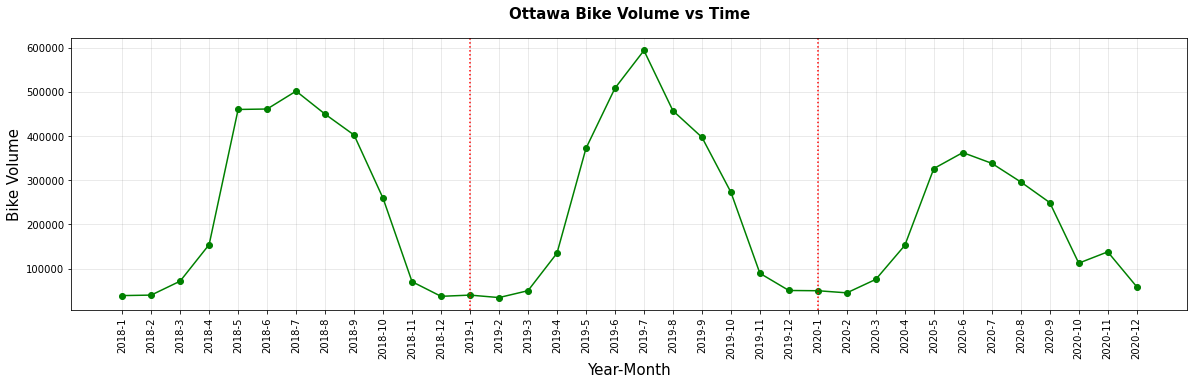

In [17]:
#plotting ottawa bike volume trend against time
plt.figure(figsize=(20,5))
plt.plot(year_ott["Yr-Mt"],year_ott["Total Bike Volume"],color = "g", marker = "o")
plt.xticks(rotation=90)
plt.title("Ottawa Bike Volume vs Time",fontsize = 15, fontweight = 'bold',y=1.05)
plt.ylabel("Bike Volume",fontsize = 15)
plt.xlabel("Year-Month",fontsize = 15)
plt.grid(b=None, which='major', axis='both', color = "grey", alpha = 0.20)
plt.axvline(12, color = "red", linestyle = "dotted")
plt.axvline(24, color = "red", linestyle = "dotted")


Plotting total bike volume against year-month shows a clear seasonal trend where bike volume is lowest in winter months and highest in summer months. This is to be expected since in winter temperatures are low and not ideal for bike riding. In addition it can also be observed that the over-all bike volume is lower in 2020 compared to 2019 and 2018

## Summarizing Ottawa Monthly Theft Volume

In [18]:
#visualize
OTT_theft.head()
#one incident per line, counting incidents should give total number of incidents.

,Incident_StartDate,YEAR,MONTH,DAY,WEEKDAY,X,Y,LAT,LNG
0,2018-05-17,2018,5,17,Thursday,362989.6811,5015885.441,45.283108,-76.746999
1,2018-06-15,2018,6,15,Friday,363095.6819,5015986.442,45.284038,-76.745676
2,2018-09-20,2018,9,20,Thursday,362193.6729,5014083.423,45.266740,-76.756644
3,2019-05-06,2019,5,6,Monday,362524.6789,5016024.441,45.284268,-76.752964
4,2019-05-13,2019,5,13,Monday,362132.6740,5014518.427,45.270641,-76.757542


In [19]:
#grouping data per year and month
o_theft_group = OTT_theft.groupby(['YEAR', 'MONTH']).count()
o_theft_group.reset_index(inplace=True)

#adding a x-axis marker for data series plots
o_theft_group["YEAR"] = o_theft_group["YEAR"].astype(str)
o_theft_group["MONTH"] = o_theft_group["MONTH"].astype(str)

#adding additional column which is a combination of Year and Month for plotting
o_theft_group['Yr-Mt'] = o_theft_group[["YEAR", "MONTH"]].agg("-".join,axis = 1)
o_theft_group=o_theft_group.rename(columns={"Incident_StartDate": "Theft Volume"})

o_theft_group

,YEAR,MONTH,Theft Volume,DAY,WEEKDAY,X,Y,LAT,LNG,Yr-Mt
0,2018,1,9,9,9,9,9,9,9,2018-1
1,2018,2,6,6,6,6,6,6,6,2018-2
2,2018,3,16,16,16,16,16,16,16,2018-3
3,2018,4,60,60,60,60,60,60,60,2018-4
4,2018,5,188,188,188,188,188,188,188,2018-5
5,2018,6,248,248,248,248,248,248,248,2018-6
6,2018,7,223,223,223,223,223,223,223,2018-7
7,2018,8,171,171,171,171,171,171,171,2018-8
8,2018,9,160,160,160,160,160,160,160,2018-9
9,2018,10,80,80,80,80,80,80,80,2018-10


## Summarizing Vancouver Monthly Theft Volume

In [20]:
#grouping data per year and month
v_theft_group = VAC_theft.groupby(['YEAR', 'MONTH']).count()
v_theft_group.reset_index(inplace=True)

#adding a x-axis marker for data series plots
v_theft_group["YEAR"] = v_theft_group["YEAR"].astype(str)
v_theft_group["MONTH"] = v_theft_group["MONTH"].astype(str)

#adding additional column which is a combination of Year and Month for plotting
v_theft_group['Yr-Mt'] = v_theft_group[["YEAR", "MONTH"]].agg("-".join,axis = 1)
v_theft_group=v_theft_group.rename(columns={"Incident_Date": "Theft Volume"})

v_theft_group

,YEAR,MONTH,Theft Volume,DAY,WEEKDAY,X,Y,LAT,LNG,Yr-Mt
0,2018,1,86,86,86,86,86,86,86,2018-1
1,2018,2,71,71,71,71,71,71,71,2018-2
2,2018,3,98,98,98,98,98,98,98,2018-3
3,2018,4,140,140,140,140,140,140,140,2018-4
4,2018,5,241,241,241,241,241,241,241,2018-5
5,2018,6,233,233,233,233,233,233,233,2018-6
6,2018,7,333,333,333,333,333,333,333,2018-7
7,2018,8,300,300,300,300,300,300,300,2018-8
8,2018,9,267,267,267,267,267,267,267,2018-9
9,2018,10,169,169,169,169,169,169,169,2018-10


In [21]:
#transforming Theft Volume to Zcore so can plot ottawa and vancouver together
v_theft_group['Theft Volume ZScore'] = zscore(v_theft_group['Theft Volume'])
v_theft_group

,YEAR,MONTH,Theft Volume,DAY,WEEKDAY,X,Y,LAT,LNG,Yr-Mt,Theft Volume ZScore
0,2018,1,86,86,86,86,86,86,86,2018-1,-1.124732
1,2018,2,71,71,71,71,71,71,71,2018-2,-1.310354
2,2018,3,98,98,98,98,98,98,98,2018-3,-0.976234
3,2018,4,140,140,140,140,140,140,140,2018-4,-0.456493
4,2018,5,241,241,241,241,241,241,241,2018-5,0.793362
5,2018,6,233,233,233,233,233,233,233,2018-6,0.694364
6,2018,7,333,333,333,333,333,333,333,2018-7,1.931844
7,2018,8,300,300,300,300,300,300,300,2018-8,1.523476
8,2018,9,267,267,267,267,267,267,267,2018-9,1.115107
9,2018,10,169,169,169,169,169,169,169,2018-10,-0.097623


In [22]:
#transforming Theft Volume to Zcore so can plot ottawa and vancouver together
o_theft_group['Theft Volume ZScore'] = zscore(o_theft_group['Theft Volume'])
o_theft_group

,YEAR,MONTH,Theft Volume,DAY,WEEKDAY,X,Y,LAT,LNG,Yr-Mt,Theft Volume ZScore
0,2018,1,9,9,9,9,9,9,9,2018-1,-1.064800
1,2018,2,6,6,6,6,6,6,6,2018-2,-1.102917
2,2018,3,16,16,16,16,16,16,16,2018-3,-0.975861
3,2018,4,60,60,60,60,60,60,60,2018-4,-0.416814
4,2018,5,188,188,188,188,188,188,188,2018-5,1.209503
5,2018,6,248,248,248,248,248,248,248,2018-6,1.971839
6,2018,7,223,223,223,223,223,223,223,2018-7,1.654199
7,2018,8,171,171,171,171,171,171,171,2018-8,0.993508
8,2018,9,160,160,160,160,160,160,160,2018-9,0.853746
9,2018,10,80,80,80,80,80,80,80,2018-10,-0.162702


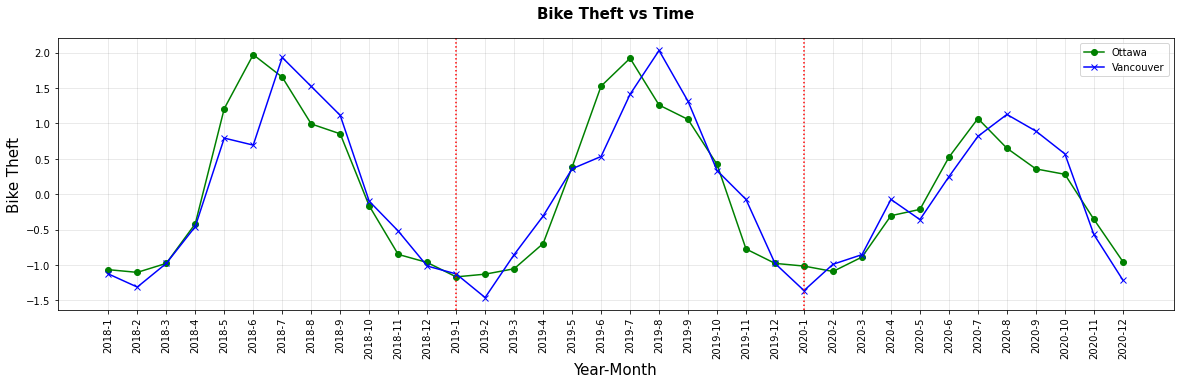

In [23]:
#plotting both theft volume 
plt.figure(figsize=(20,5))
plt.plot(o_theft_group["Yr-Mt"],o_theft_group["Theft Volume ZScore"],color = "g", marker = "o",label="Ottawa")
plt.plot(v_theft_group["Yr-Mt"],v_theft_group["Theft Volume ZScore"],color = "b", marker = "x",label="Vancouver")
plt.xticks(rotation=90)
plt.title("Bike Theft vs Time",fontsize = 15, fontweight = 'bold',y=1.05)
plt.ylabel("Bike Theft",fontsize = 15)
plt.xlabel("Year-Month",fontsize = 15)
plt.grid(b=None, which='major', axis='both', color = "grey", alpha = 0.20)
plt.axvline(12, color = "red", linestyle = "dotted")
plt.axvline(24, color = "red", linestyle = "dotted")
plt.legend()

In [24]:
#transforming Bike Volume to Zcore so can plot ottawa and vancouver together
year_ott["Total Bike Volume ZScore"] = zscore(year_ott["Total Bike Volume"])
monthly_vac_bv["Total Bike Volume Zscore"] = zscore(monthly_vac_bv["Total Bike Volume"])


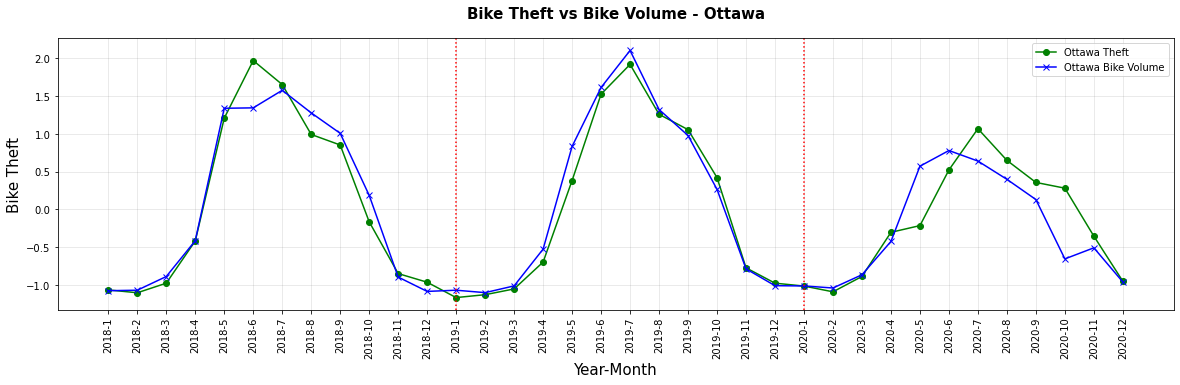

In [25]:
#plotting both theft volume and bike volume for ottawa
plt.figure(figsize=(20,5))
plt.plot(o_theft_group["Yr-Mt"],o_theft_group["Theft Volume ZScore"],color = "g", marker = "o",label="Ottawa Theft")
plt.plot(year_ott["Yr-Mt"],year_ott["Total Bike Volume ZScore"],color = "b", marker = "x",label="Ottawa Bike Volume")
plt.xticks(rotation=90)
plt.title("Bike Theft vs Bike Volume - Ottawa",fontsize = 15, fontweight = 'bold',y=1.05)
plt.ylabel("Bike Theft",fontsize = 15)
plt.xlabel("Year-Month",fontsize = 15)
plt.grid(b=None, which='major', axis='both', color = "grey", alpha = 0.20)
plt.axvline(12, color = "red", linestyle = "dotted")
plt.axvline(24, color = "red", linestyle = "dotted")
plt.legend()

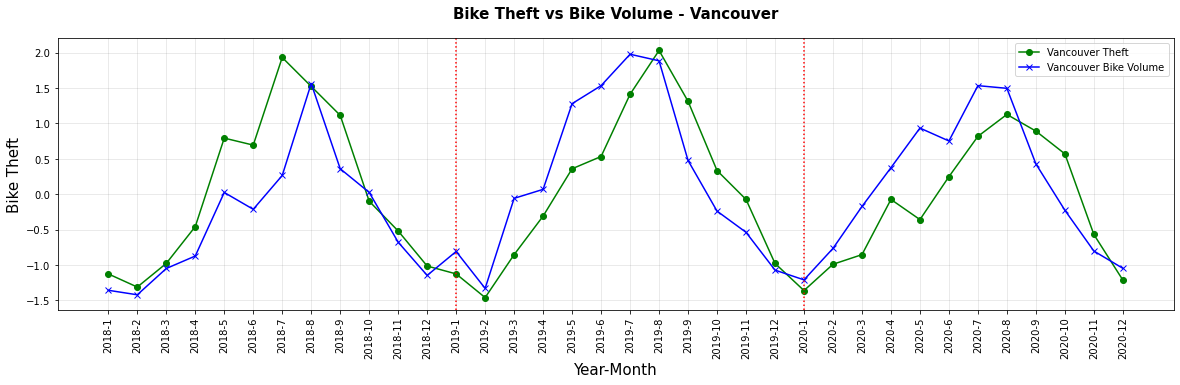

In [26]:
#plotting both theft volume and bike volume for vancouver
plt.figure(figsize=(20,5))
plt.plot(v_theft_group["Yr-Mt"],v_theft_group["Theft Volume ZScore"],color = "g", marker = "o",label="Vancouver Theft")
plt.plot(monthly_vac_bv["Yr-Mt"],monthly_vac_bv["Total Bike Volume Zscore"],color = "b", marker = "x",label="Vancouver Bike Volume")
plt.xticks(rotation=90)
plt.title("Bike Theft vs Bike Volume - Vancouver",fontsize = 15, fontweight = 'bold',y=1.05)
plt.ylabel("Bike Theft",fontsize = 15)
plt.xlabel("Year-Month",fontsize = 15)
plt.grid(b=None, which='major', axis='both', color = "grey", alpha = 0.20)
plt.axvline(12, color = "red", linestyle = "dotted")
plt.axvline(24, color = "red", linestyle = "dotted")
plt.legend()

# Vancouver 
To asseses if there is a relationship between theft and biking volume:
   * Step 1: asses average number of thefts each year
   * Step 2: conduct T-test to see if the increase/decrease in thefts is significant
   * Step 3: regress bike volume against bike theft (will have to split each year into two, so able to fit into a linear regression model)

In [27]:
#split data sets yearly
VAC_TV_2020 = v_theft_group.loc[v_theft_group['YEAR'] == "2020"]
VAC_TV_2019 = v_theft_group.loc[v_theft_group['YEAR'] == "2019"]
VAC_TV_2018 = v_theft_group.loc[v_theft_group['YEAR'] == "2018"]

In [28]:
#Step 1: asses average number of thefts each year

#investigate 2018 stats
s_df_2018=VAC_TV_2018.describe()
mean_2018 = s_df_2018.iloc[1]['Theft Volume']

#investigate 2019 stats
s_df_2019=VAC_TV_2019.describe()
mean_2019 = s_df_2019.iloc[1]['Theft Volume']

#investigate 2020 stats
s_df_2020=VAC_TV_2020.describe()
mean_2020 = s_df_2020.iloc[1]['Theft Volume']

mean_df = pd.DataFrame(np.array([[mean_2018,mean_2019,mean_2020]]),
                   columns=['2018', '2019', '2020'])
mean_df

,2018,2019,2020
0,180.666667,184.916667,165.083333


looking at averages of bike thefts, it looks like bike thefts increased slighly from 2018 to 2019 but reduced in 2020. In step two it will be investigated if these increases/decreases are significant

In [29]:
VAC_theft.head()

,Incident_Date,YEAR,MONTH,DAY,WEEKDAY,X,Y,LAT,LNG
0,2018-07-29,2018,7,29,Sunday,491104.2910,5.459077e+06,49.284384,-123.122320
1,2019-08-05,2019,8,5,Monday,490847.1395,5.458873e+06,49.282539,-123.125851
2,2019-09-12,2019,9,12,Thursday,490863.9836,5.458842e+06,49.282263,-123.125618
3,2018-06-03,2018,6,3,Sunday,490903.5756,5.458801e+06,49.281892,-123.125073
4,2018-06-05,2018,6,5,Tuesday,490903.5756,5.458801e+06,49.281892,-123.125073


In [30]:
VAC_theft.dtypes

Incident_Date     object
YEAR               int64
MONTH              int64
DAY                int64
WEEKDAY           object
X                float64
Y                float64
LAT              float64
LNG              float64
dtype: object

In [31]:
#extracting each year (using daily data, more data points)
VAC_TV_2020_Daily = VAC_theft.loc[VAC_theft['YEAR'] == 2020]
VAC_TV_2019_Daily = VAC_theft.loc[VAC_theft['YEAR'] == 2019]
VAC_TV_2018_Daily = VAC_theft.loc[VAC_theft['YEAR'] == 2018]
VAC_TV_2020_Daily

,Incident_Date,YEAR,MONTH,DAY,WEEKDAY,X,Y,LAT,LNG
8,2020-10-18,2020,10,18,Sunday,490197.4785,5.458239e+06,49.276833,-123.134768
9,2020-11-03,2020,11,3,Tuesday,490197.4785,5.458239e+06,49.276833,-123.134768
12,2020-05-30,2020,5,30,Saturday,490227.2225,5.458210e+06,49.276572,-123.134358
17,2020-06-12,2020,6,12,Friday,490249.3649,5.458167e+06,49.276179,-123.134053
18,2020-10-20,2020,10,20,Tuesday,490249.3649,5.458167e+06,49.276179,-123.134053
...,...,...,...,...,...,...,...,...,...
6339,2020-10-31,2020,10,31,Saturday,492757.4868,5.458792e+06,49.281843,-123.099582
6340,2020-11-14,2020,11,14,Saturday,492757.4868,5.458792e+06,49.281843,-123.099582
6341,2020-12-07,2020,12,7,Monday,492757.4868,5.458792e+06,49.281843,-123.099582
6355,2020-05-17,2020,5,17,Sunday,492765.9374,5.458793e+06,49.281851,-123.099466


In [32]:
#grouping data per date for each year

#2020
VAC_TV_2020_Daily = VAC_TV_2020_Daily.groupby(['DAY']).count()
VAC_TV_2020_Daily.reset_index(inplace=True)
VAC_TV_2020_Daily=VAC_TV_2020_Daily.rename(columns={"Incident_Date": "Theft Volume"})
VAC_TV_2020_Daily=VAC_TV_2020_Daily[["DAY","Theft Volume"]]

#2019
VAC_TV_2019_Daily = VAC_TV_2019_Daily.groupby(['DAY']).count()
VAC_TV_2019_Daily.reset_index(inplace=True)
VAC_TV_2019_Daily=VAC_TV_2019_Daily.rename(columns={"Incident_Date": "Theft Volume"})
VAC_TV_2019_Daily=VAC_TV_2019_Daily[["DAY","Theft Volume"]]

#2018
VAC_TV_2018_Daily = VAC_TV_2018_Daily.groupby(['DAY']).count()
VAC_TV_2018_Daily.reset_index(inplace=True)
VAC_TV_2018_Daily=VAC_TV_2018_Daily.rename(columns={"Incident_Date": "Theft Volume"})
VAC_TV_2018_Daily=VAC_TV_2018_Daily[["DAY","Theft Volume"]]


In [33]:
#Step 2: conduct T-test to see if the increase/decrease in thefts is significant

#conducting t-test between 2018 and 2019 vancouver theft volume
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance

stats.ttest_ind(VAC_TV_2018_Daily["Theft Volume"], VAC_TV_2019_Daily["Theft Volume"], equal_var=False)

Ttest_indResult(statistic=-0.5096314997745772, pvalue=0.6121845677471635)

The p value is higher than 0.05, meaning the increase in thefts is not statistically significant

In [34]:
#conducting t-test between 2019 and 2020 vancouver theft volume
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance

stats.ttest_ind(VAC_TV_2019_Daily["Theft Volume"], VAC_TV_2020_Daily["Theft Volume"], equal_var=False)

Ttest_indResult(statistic=2.394539082200429, pvalue=0.019787338235716538)

The p value is lower than 0.05, meaning the decrease in thefts is statistically significant. Therefore, we can conclude that bike thefts reduced in 2020 compared to 2019. 

Step 3: regress bike volume against bike theft (will have to split each year into two, so able to fit into a linear regression model)

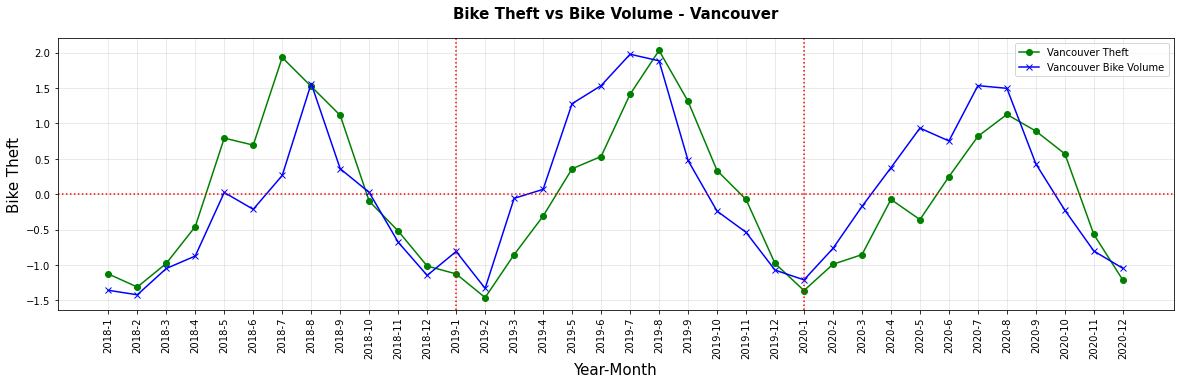

In [35]:
#plotting both theft volume and bike volume for vancouver
plt.figure(figsize=(20,5))
plt.plot(v_theft_group["Yr-Mt"],v_theft_group["Theft Volume ZScore"],color = "g", marker = "o",label="Vancouver Theft")
plt.plot(monthly_vac_bv["Yr-Mt"],monthly_vac_bv["Total Bike Volume Zscore"],color = "b", marker = "x",label="Vancouver Bike Volume")
plt.xticks(rotation=90)
plt.title("Bike Theft vs Bike Volume - Vancouver",fontsize = 15, fontweight = 'bold',y=1.05)
plt.ylabel("Bike Theft",fontsize = 15)
plt.xlabel("Year-Month",fontsize = 15)
plt.grid(b=None, which='major', axis='both', color = "grey", alpha = 0.20)
plt.axvline(12, color = "red", linestyle = "dotted")
plt.axvline(24, color = "red", linestyle = "dotted")
plt.axhline(0, color = "red", linestyle = "dotted")
plt.legend()

looking at the graph above, there are two distint linear time periods
  * first period: January to August
  * second period September to December

Each year will be split into these two periods and a total of 3 linear regressions will be run to asses if any period has significant relationship between bike theft and bike volume
  * List of Linear Regressions: 
      1. 2018 Bike Volume vs Bike Theft
      2. 2019 Bike Volume vs Bike Theft
      3. 2020 Bike Volume vs Bike Theft


In [36]:
v_theft_group.head()

,YEAR,MONTH,Theft Volume,DAY,WEEKDAY,X,Y,LAT,LNG,Yr-Mt,Theft Volume ZScore
0,2018,1,86,86,86,86,86,86,86,2018-1,-1.124732
1,2018,2,71,71,71,71,71,71,71,2018-2,-1.310354
2,2018,3,98,98,98,98,98,98,98,2018-3,-0.976234
3,2018,4,140,140,140,140,140,140,140,2018-4,-0.456493
4,2018,5,241,241,241,241,241,241,241,2018-5,0.793362


In [38]:
#spliting years 
v_theft_2018 = v_theft_group.loc[(v_theft_group["YEAR"] == "2018")]
v_theft_2019 = v_theft_group.loc[(v_theft_group["YEAR"] == "2019")]
v_theft_2020 = v_theft_group.loc[(v_theft_group["YEAR"] == "2020")]
v_theft_2020



,YEAR,MONTH,Theft Volume,DAY,WEEKDAY,X,Y,LAT,LNG,Yr-Mt,Theft Volume ZScore
24,2020,1,67,67,67,67,67,67,67,2020-1,-1.359853
25,2020,2,97,97,97,97,97,97,97,2020-2,-0.988609
26,2020,3,108,108,108,108,108,108,108,2020-3,-0.852486
27,2020,4,171,171,171,171,171,171,171,2020-4,-0.072874
28,2020,5,148,148,148,148,148,148,148,2020-5,-0.357494
29,2020,6,197,197,197,197,197,197,197,2020-6,0.248871
30,2020,7,243,243,243,243,243,243,243,2020-7,0.818112
31,2020,8,268,268,268,268,268,268,268,2020-8,1.127482
32,2020,9,249,249,249,249,249,249,249,2020-9,0.892361
33,2020,10,223,223,223,223,223,223,223,2020-10,0.570616


In [39]:
monthly_vac_bv.head()

,Year,Month-NonNumeric,Total Bike Volume,Order,Yr-Mt,Total Bike Volume Zscore
0,2018,January,249000.0,1,2018-1,-1.355928
1,2018,February,219000.0,2,2018-2,-1.419592
2,2018,March,394000.0,3,2018-3,-1.048216
3,2018,April,477000.0,4,2018-4,-0.872078
4,2018,May,900000.0,5,2018-5,0.025589


In [40]:
#spliting years 
v_bv_2018 = monthly_vac_bv.loc[(monthly_vac_bv["Year"] == "2018")]
v_bv_2019 = monthly_vac_bv.loc[(monthly_vac_bv["Year"] == "2019")]
v_bv_2020 = monthly_vac_bv.loc[(monthly_vac_bv["Year"] == "2020")]
v_bv_2020




,Year,Month-NonNumeric,Total Bike Volume,Order,Yr-Mt,Total Bike Volume Zscore
24,2020,January,318295.0,1,2020-1,-1.208873
25,2020,February,527736.0,2,2020-2,-0.764409
26,2020,March,806655.0,3,2020-3,-0.172502
27,2020,April,1064972.0,4,2020-4,0.375684
28,2020,May,1328537.0,5,2020-5,0.935007
29,2020,June,1242623.0,6,2020-6,0.752685
30,2020,July,1610860.0,7,2020-7,1.534138
31,2020,August,1593073.0,8,2020-8,1.496391
32,2020,September,1090049.0,9,2020-9,0.428901
33,2020,October,781676.0,10,2020-10,-0.225512


The r-squared is: 0.7999613973302705
The r-squared is: 7.46274224836405e-09


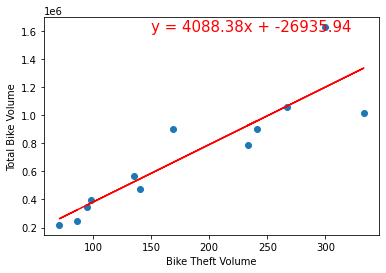

In [41]:
# Reg #1: 2018 Bike Volume vs Bike Theft

x_values = v_theft_2018['Theft Volume']
y_values = v_bv_2018['Total Bike Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(150,1600000),fontsize=15,color="red")
plt.xlabel('Bike Theft Volume')
plt.ylabel('Total Bike Volume')
print(f"The r-squared is: {rvalue**2}")
print(f"The r-squared is: {pvalue**2}")
plt.show()

R squareed is close to 1, p value is less that 0.05. This is a significant relationship. Meaning bike thefts do effect bike volume for 2018 Jan-Aug

The r-squared is: 0.7378773740359154
The r-squared is: 1.188443998215713e-07


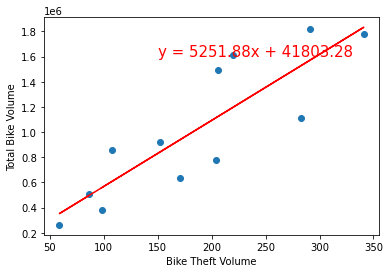

In [42]:
# Reg #2: 2019 Bike Volume vs Bike Theft

x_values = v_theft_2019['Theft Volume']
y_values = v_bv_2019['Total Bike Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(150,1600000),fontsize=15,color="red")
plt.xlabel('Bike Theft Volume')
plt.ylabel('Total Bike Volume')
print(f"The r-squared is: {rvalue**2}")
print(f"The r-squared is: {pvalue**2}")
plt.show()

R squareed is close to 1, p value is less that 0.05. This is a significant relationship. Meaning bike thefts do effect bike volume for 2018 Sept-Dec. Note this comparision has fewer data points

The r-squared is: 0.6654328946210524
The r-squared is: 1.4801217113200496e-06


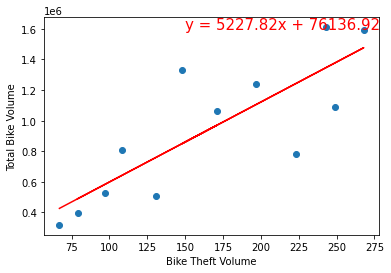

In [43]:
# Reg #3: 2020 Bike Volume vs Bike Theft

x_values = v_theft_2020['Theft Volume']
y_values = v_bv_2020['Total Bike Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(150,1600000),fontsize=15,color="red")
plt.xlabel('Bike Theft Volume')
plt.ylabel('Total Bike Volume')
print(f"The r-squared is: {rvalue**2}")
print(f"The r-squared is: {pvalue**2}")
plt.show()

R squareed is close to 1, p value is less that 0.05. This is a significant relationship. Meaning bike thefts do effect bike volume for 2019 Jan-Aug